In [1]:
# Import essential libraries
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import cv2
# For snapshot Ensemble
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
#loading the EfficientNetB4 TL model
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientNetpreprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionV3_preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetV2_preprocessing
import random
import os


In [2]:
# Random seed for reproducibility
SEED = 42

random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.compat.v1.set_random_seed(SEED)

In [3]:
# Dataset folders 
dataset_dir = '../input/anndl-homework-1/training_data_final'
training_dir = os.path.join(dataset_dir, '')

In [4]:
# Model hyperparameters
INPUT_SHAPE = (96, 96, 3)
IMAGE_SIZE = (INPUT_SHAPE[0], INPUT_SHAPE[1])
EPOCHS = 50
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
NUM_CLASSES = 8

In [5]:
# data generator for splitting the validation set and training set and data augmentation
# Constructor
train_data_gen = ImageDataGenerator(
    # Data Augmentation
    #rotation_range=30,
    #height_shift_range=20,
    #width_shift_range=20,
    #zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    #brightness_range=[0.7,1.3],
    #fill_mode='reflect',
    validation_split=0.1,
    preprocessing_function=resnet_preprocess
)

# Generator
train_gen = train_data_gen.flow_from_directory(
    directory=training_dir,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    subset="training"
)

# Constructor
valid_data_gen = ImageDataGenerator(
    preprocessing_function=resnet_preprocess
)

aug_validation_gen = train_data_gen.flow_from_directory(directory=training_dir,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    subset="validation")

Found 3191 images belonging to 8 classes.
Found 351 images belonging to 8 classes.


In [6]:
def resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    flatten_layer = tf.keras.layers.Flatten()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(1024, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(256, activation=None, kernel_initializer = tf.keras.initializers.HeUniform(SEED))
    prediction_layer = layers.Dense(8, activation='softmax')
    batch_norm = layers.BatchNormalization()
    Relu = layers.ReLU()
    for layer in base_model.layers[:30]:
        layer.trainable = False
    model = Sequential([
    base_model,
    #GAP,
    #flatten_layer,
    GAP,
    #dense_layer_3,
    #dropout,
    #dense_layer_1,
    #dropout,
    dense_layer_2,
    #batch_norm,
    Relu,
    dropout,
    prediction_layer
    ])
    #for layer in model.layers[:1]:
    #    layer.trainable = False
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
def resnet50_model_1():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(512, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(256, activation=None, kernel_initializer = tf.keras.initializers.HeUniform(SEED))
    prediction_layer = layers.Dense(8, activation='softmax')
    batch_norm = layers.BatchNormalization()
    Relu = layers.ReLU()
    for layer in base_model.layers[:30]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    dense_layer_3,
    #dense_layer_1,
    #dropout,
    #dense_layer_2,
    #batch_norm,
    dropout,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
def resnet50_model_2():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(512, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(256, activation=None, kernel_initializer = tf.keras.initializers.HeUniform(SEED))
    prediction_layer = layers.Dense(8, activation='softmax')
    batch_norm = layers.BatchNormalization()
    Relu = layers.ReLU()
    for layer in base_model.layers[:30]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    #dense_layer_3,
    #dense_layer_1,
    #dropout,
    dense_layer_2,
    #batch_norm,
    Relu,
    dropout,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
def resnet50_model_3():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(512, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(256, activation=None, kernel_initializer = tf.keras.initializers.HeUniform(SEED))
    prediction_layer = layers.Dense(8, activation='softmax')
    batch_norm = layers.BatchNormalization()
    Relu = layers.ReLU()
    for layer in base_model.layers[:30]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    #dense_layer_3,
    dense_layer_1,
    #dropout,
    #dense_layer_2,
    #batch_norm,
    dropout,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
def resnet152_model():
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(256, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(512, activation='relu')
    prediction_layer = layers.Dense(8, activation='softmax')
    Relu = layers.ReLU()
    for layer in base_model.layers[:40]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    #dense_layer_3,
    #dense_layer_2,
    dense_layer_1,
    dropout,
    #dense_layer_1,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
def resnet152_model_1():
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(256, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(512, activation='relu')
    prediction_layer = layers.Dense(8, activation='softmax')
    Relu = layers.ReLU()
    for layer in base_model.layers[:40]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    #dense_layer_3,
    dense_layer_2,
    #dense_layer_1,
    dropout,
    #dense_layer_1,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
def resnet152_model_2():
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    GAP = layers.GlobalAveragePooling2D()
    dense_layer_3 = layers.Dense(1024, activation='relu')
    dense_layer_1 = layers.Dense(256, activation='relu')
    dropout = tf.keras.layers.Dropout(0.3)
    dense_layer_2 = layers.Dense(512, activation='relu')
    prediction_layer = layers.Dense(8, activation='softmax')
    Relu = layers.ReLU()
    for layer in base_model.layers[:40]:
        layer.trainable = False
    model = Sequential([
    base_model,
    GAP,
    dense_layer_3,
    #dense_layer_2,
    #dense_layer_1,
    dropout,
    #dense_layer_1,
    prediction_layer
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Utility function for callbacks for training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
# Model checkpoint
mcp_save_ResNet50 = ModelCheckpoint('model_ResNet50.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet50_1 = ModelCheckpoint('model_ResNet50_1.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet50_2 = ModelCheckpoint('model_ResNet50_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet50_3 = ModelCheckpoint('model_ResNet50_3.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet152 = ModelCheckpoint('model_ResNet152.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet152_1 = ModelCheckpoint('model_ResNet152_1.hdf5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save_ResNet152_2 = ModelCheckpoint('model_ResNet152_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [14]:
model_ResNet50 = resnet50_model()
model_ResNet50.summary()

2022-11-28 15:02:44.804569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:02:44.921197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:02:44.922055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 15:02:44.923204: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
Total params: 24,114,312
Trainable params: 23,888,712
Non

In [15]:
#Training the model ResNet50 (This training procedure happend 9 times with different seed and each time we saved the best models based on the validation loss)
history_ResNet50 = model_ResNet50.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet50],
    validation_data= aug_validation_gen
)

2022-11-28 15:02:58.125968: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-28 15:03:03.423893: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


200/200 [==============================] - 27s 78ms/step - loss: 1.3979 - accuracy: 0.5067 - val_loss: 0.8293 - val_accuracy: 0.7094


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
200/200 [==============================] - 9s 46ms/step - loss: 0.8317 - accuracy: 0.7095 - val_loss: 0.8451 - val_accuracy: 0.7436
Epoch 3/50
200/200 [==============================] - 9s 46ms/step - loss: 0.6730 - accuracy: 0.7816 - val_loss: 0.7010 - val_accuracy: 0.7977
Epoch 4/50
200/200 [==============================] - 10s 47ms/step - loss: 0.5320 - accuracy: 0.8245 - val_loss: 0.6517 - val_accuracy: 0.7977
Epoch 5/50
200/200 [==============================] - 9s 46ms/step - loss: 0.4388 - accuracy: 0.8518 - val_loss: 0.7332 - val_accuracy: 0.8006
Epoch 6/50
200/200 [==============================] - 9s 45ms/step - loss: 0.3866 - accuracy: 0.8734 - val_loss: 0.7184 - val_accuracy: 0.8006
Epoch 7/50
200/200 [==============================] - 9s 47ms/step - loss: 0.3510 - accuracy: 0.8837 - val_loss: 0.6231 - val_accuracy: 0.8177
Epoch 8/50
200/200 [==============================] - 9s 45ms/step - loss: 0.3272 - accuracy: 0.8963 - val_loss: 0.6606 - val_accuracy: 0.809

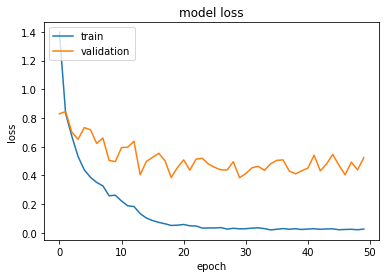

In [18]:
#plotting the validation and train loss
plt.plot(history_ResNet50.history['loss'])
plt.plot(history_ResNet50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

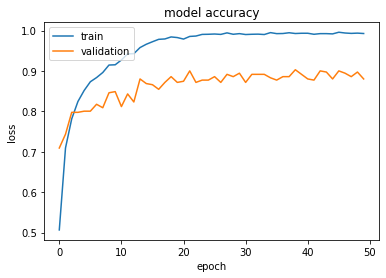

In [19]:
#plotting the validation and train ACC
plt.plot(history_ResNet50.history['accuracy'])
plt.plot(history_ResNet50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
model_ResNet50_1 = resnet50_model_1()
model_ResNet50_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 8200      
Total params: 25,694,088
Trainable params: 25,468,488
Non-trainable params: 225,600
_________________________________________________________________


In [21]:
#Training the model ResNet50
history_ResNet50_1 = model_ResNet50_1.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet50_1],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 15s 49ms/step - loss: 1.2591 - accuracy: 0.5707 - val_loss: 0.9431 - val_accuracy: 0.6809
Epoch 2/50
200/200 [==============================] - 9s 46ms/step - loss: 0.7802 - accuracy: 0.7317 - val_loss: 0.6896 - val_accuracy: 0.7664
Epoch 3/50
200/200 [==============================] - 9s 46ms/step - loss: 0.5806 - accuracy: 0.8048 - val_loss: 0.6689 - val_accuracy: 0.7778
Epoch 4/50
200/200 [==============================] - 9s 46ms/step - loss: 0.4780 - accuracy: 0.8327 - val_loss: 0.6310 - val_accuracy: 0.8148
Epoch 5/50
200/200 [==============================] - 9s 45ms/step - loss: 0.3742 - accuracy: 0.8775 - val_loss: 0.5719 - val_accuracy: 0.8433
Epoch 6/50
200/200 [==============================] - 9s 45ms/step - loss: 0.3187 - accuracy: 0.8928 - val_loss: 0.5081 - val_accuracy: 0.8604
Epoch 7/50
200/200 [==============================] - 9s 46ms/step - loss: 0.3127 - accuracy: 0.8941 - val_loss: 0.6525 - val_accuracy: 0.817

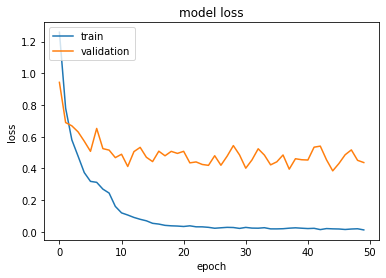

In [22]:
#plotting the validation and train loss
plt.plot(history_ResNet50_1.history['loss'])
plt.plot(history_ResNet50_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

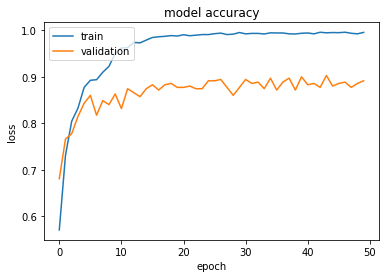

In [23]:
#plotting the validation and train ACC
plt.plot(history_ResNet50_1.history['accuracy'])
plt.plot(history_ResNet50_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
model_ResNet50_2 = resnet50_model_2()
model_ResNet50_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524544    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 2056      
Total params: 24,114,312
Trainable params: 23,888,712
Non-trainable params: 225,600
____________________________________

In [25]:
#Training the model ResNet50
history_ResNet50_2 = model_ResNet50_2.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet50_2],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 14s 49ms/step - loss: 1.3935 - accuracy: 0.5136 - val_loss: 0.9090 - val_accuracy: 0.6923
Epoch 2/50
200/200 [==============================] - 9s 45ms/step - loss: 0.8514 - accuracy: 0.7089 - val_loss: 0.7950 - val_accuracy: 0.7123
Epoch 3/50
200/200 [==============================] - 9s 47ms/step - loss: 0.6396 - accuracy: 0.7869 - val_loss: 0.6406 - val_accuracy: 0.7977
Epoch 4/50
200/200 [==============================] - 9s 45ms/step - loss: 0.5483 - accuracy: 0.8195 - val_loss: 0.5631 - val_accuracy: 0.8034
Epoch 5/50
200/200 [==============================] - 9s 45ms/step - loss: 0.4590 - accuracy: 0.8464 - val_loss: 0.6687 - val_accuracy: 0.7806
Epoch 6/50
200/200 [==============================] - 9s 47ms/step - loss: 0.3542 - accuracy: 0.8793 - val_loss: 0.6910 - val_accuracy: 0.7949
Epoch 7/50
200/200 [==============================] - 9s 45ms/step - loss: 0.3328 - accuracy: 0.8916 - val_loss: 0.5077 - val_accuracy: 0.831

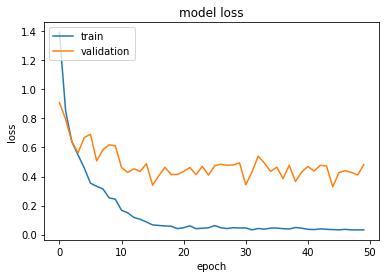

In [26]:
#plotting the validation and train loss
plt.plot(history_ResNet50_2.history['loss'])
plt.plot(history_ResNet50_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

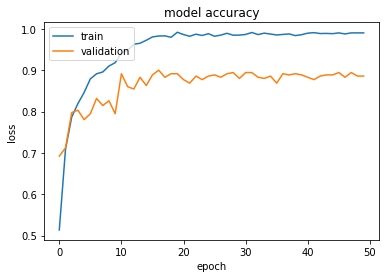

In [27]:
#plotting the validation and train ACC
plt.plot(history_ResNet50_2.history['accuracy'])
plt.plot(history_ResNet50_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
model_ResNet50_3 = resnet50_model_3()
model_ResNet50_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 4104      
Total params: 24,640,904
Trainable params: 24,415,304
Non-trainable params: 225,600
_________________________________________________________________


In [43]:
#Training the model ResNet50
history_ResNet50_3 = model_ResNet50_3.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet50_3],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 16s 56ms/step - loss: 1.3420 - accuracy: 0.5384 - val_loss: 0.9411 - val_accuracy: 0.6724
Epoch 2/50
200/200 [==============================] - 10s 48ms/step - loss: 0.8063 - accuracy: 0.7220 - val_loss: 0.7736 - val_accuracy: 0.7436
Epoch 3/50
200/200 [==============================] - 10s 48ms/step - loss: 0.6426 - accuracy: 0.7803 - val_loss: 0.6399 - val_accuracy: 0.7920
Epoch 4/50
200/200 [==============================] - 10s 50ms/step - loss: 0.5058 - accuracy: 0.8370 - val_loss: 0.5781 - val_accuracy: 0.8091
Epoch 5/50
200/200 [==============================] - 10s 48ms/step - loss: 0.4306 - accuracy: 0.8515 - val_loss: 0.6240 - val_accuracy: 0.8348
Epoch 6/50
200/200 [==============================] - 10s 48ms/step - loss: 0.3543 - accuracy: 0.8759 - val_loss: 0.6671 - val_accuracy: 0.7892
Epoch 7/50
200/200 [==============================] - 10s 50ms/step - loss: 0.3175 - accuracy: 0.8966 - val_loss: 0.5318 - val_accuracy:

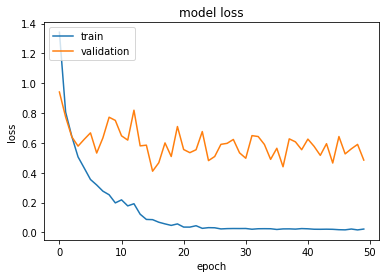

In [44]:
#plotting the validation and train loss
plt.plot(history_ResNet50_3.history['loss'])
plt.plot(history_ResNet50_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

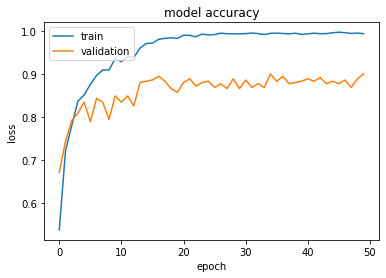

In [45]:
#plotting the validation and train ACC
plt.plot(history_ResNet50_3.history['accuracy'])
plt.plot(history_ResNet50_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Saving the best models
#model_ResNet50.save("model_ResNet50")
#model_ResNet50_1.save("model_ResNet50_1")
#model_ResNet50_2.save("model_ResNet50_2")

In [29]:
model_ResNet152 = resnet152_model()
model_ResNet152.summary()

234708992/234698864 [==============================] - 9s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 3, 3, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               524544    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 2056      
Total params: 58,897,544
Trainable params: 58,486,408
Non-trainable params: 411,136
_________________________________________________________________


In [30]:
history_ResNet152 = model_ResNet152.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet152],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 40s 127ms/step - loss: 1.2957 - accuracy: 0.5516 - val_loss: 1.2825 - val_accuracy: 0.7066
Epoch 2/50
200/200 [==============================] - 23s 116ms/step - loss: 0.8111 - accuracy: 0.7173 - val_loss: 1.3303 - val_accuracy: 0.7692
Epoch 3/50
200/200 [==============================] - 23s 116ms/step - loss: 0.6473 - accuracy: 0.7816 - val_loss: 0.8564 - val_accuracy: 0.7493
Epoch 4/50
200/200 [==============================] - 24s 118ms/step - loss: 0.5413 - accuracy: 0.8195 - val_loss: 0.7397 - val_accuracy: 0.8091
Epoch 5/50
200/200 [==============================] - 23s 116ms/step - loss: 0.4186 - accuracy: 0.8533 - val_loss: 1.0621 - val_accuracy: 0.7977
Epoch 6/50
200/200 [==============================] - 23s 113ms/step - loss: 0.4049 - accuracy: 0.8627 - val_loss: 0.7272 - val_accuracy: 0.7835
Epoch 7/50
200/200 [==============================] - 23s 117ms/step - loss: 0.3200 - accuracy: 0.8956 - val_loss: 0.6745 - val_ac

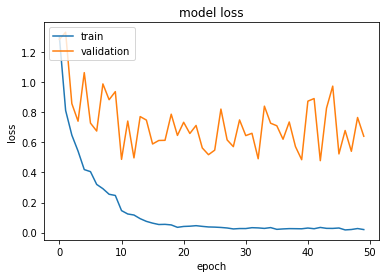

In [31]:
#plotting the validation and train loss
plt.plot(history_ResNet152.history['loss'])
plt.plot(history_ResNet152.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

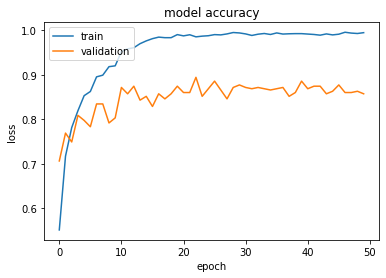

In [32]:
#plotting the validation and train ACC
plt.plot(history_ResNet152.history['accuracy'])
plt.plot(history_ResNet152.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
model_ResNet152_1 = resnet152_model_1()
model_ResNet152_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 3, 3, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 4104      
Total params: 59,424,136
Trainable params: 59,013,000
Non-trainable params: 411,136
_________________________________________________________________


In [34]:
history_ResNet152_1 = model_ResNet152_1.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet152_1],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 39s 125ms/step - loss: 1.2597 - accuracy: 0.5541 - val_loss: 1.0453 - val_accuracy: 0.6638
Epoch 2/50
200/200 [==============================] - 23s 114ms/step - loss: 0.8135 - accuracy: 0.7214 - val_loss: 4.6328 - val_accuracy: 0.5926
Epoch 3/50
200/200 [==============================] - 23s 113ms/step - loss: 0.6102 - accuracy: 0.7853 - val_loss: 0.9261 - val_accuracy: 0.7407
Epoch 4/50
200/200 [==============================] - 23s 112ms/step - loss: 0.5244 - accuracy: 0.8267 - val_loss: 12.9004 - val_accuracy: 0.4843
Epoch 5/50
200/200 [==============================] - 23s 114ms/step - loss: 0.4574 - accuracy: 0.8402 - val_loss: 0.5994 - val_accuracy: 0.7977
Epoch 6/50
200/200 [==============================] - 23s 114ms/step - loss: 0.3563 - accuracy: 0.8850 - val_loss: 0.6418 - val_accuracy: 0.8376
Epoch 7/50
200/200 [==============================] - 23s 114ms/step - loss: 0.3295 - accuracy: 0.8922 - val_loss: 0.6626 - val_a

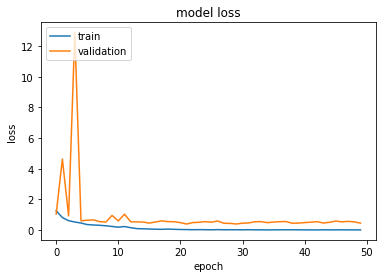

In [35]:
#plotting the validation and train loss
plt.plot(history_ResNet152_1.history['loss'])
plt.plot(history_ResNet152_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

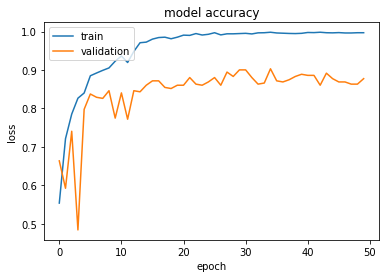

In [36]:
#plotting the validation and train ACC
plt.plot(history_ResNet152_1.history['accuracy'])
plt.plot(history_ResNet152_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
model_ResNet152_2 = resnet152_model_2()
model_ResNet152_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 3, 3, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 8200      
Total params: 60,477,320
Trainable params: 60,066,184
Non-trainable params: 411,136
_________________________________________________________________


In [38]:
history_ResNet152_2 = model_ResNet152_2.fit(train_gen,
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction, mcp_save_ResNet152_2],
    validation_data= aug_validation_gen
)

Epoch 1/50
200/200 [==============================] - 43s 135ms/step - loss: 1.2423 - accuracy: 0.5788 - val_loss: 83.2858 - val_accuracy: 0.6895
Epoch 2/50
200/200 [==============================] - 24s 121ms/step - loss: 0.7735 - accuracy: 0.7380 - val_loss: 5.4072 - val_accuracy: 0.6781
Epoch 3/50
200/200 [==============================] - 24s 120ms/step - loss: 0.5797 - accuracy: 0.8070 - val_loss: 4.3874 - val_accuracy: 0.7863
Epoch 4/50
200/200 [==============================] - 24s 119ms/step - loss: 0.4730 - accuracy: 0.8411 - val_loss: 0.7605 - val_accuracy: 0.8006
Epoch 5/50
200/200 [==============================] - 24s 118ms/step - loss: 0.4155 - accuracy: 0.8612 - val_loss: 0.6439 - val_accuracy: 0.8205
Epoch 6/50
200/200 [==============================] - 24s 119ms/step - loss: 0.3688 - accuracy: 0.8699 - val_loss: 0.8440 - val_accuracy: 0.7863
Epoch 7/50
200/200 [==============================] - 24s 118ms/step - loss: 0.3043 - accuracy: 0.9013 - val_loss: 0.6243 - val_a

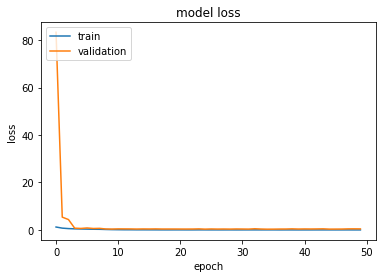

In [39]:
#plotting the validation and train loss
plt.plot(history_ResNet152_2.history['loss'])
plt.plot(history_ResNet152_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

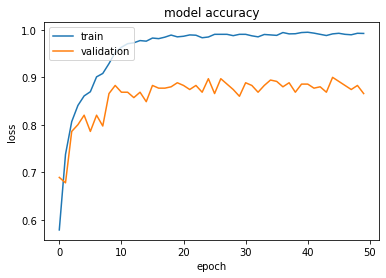

In [40]:
#plotting the validation and train ACC
plt.plot(history_ResNet152_2.history['accuracy'])
plt.plot(history_ResNet152_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Saving the best models
#model_ResNet152.save("model_ResNet152")
#model_ResNet152_1.save("model_ResNet152_1")
#model_ResNet152_2.save("model_ResNet152_2")